# Task 2

## Import Libraries

In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
from datetime import datetime

from environment_gym import TrafficEnvironment
from task2_environment import CustomTrafficEnvironment
from task2_agents import RuleBasedAgent, TemporalDifference
from visualization import extract_timesteps_from_json, create_visualization_from_cached_data

seed = 2024
training_seed = 42

c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Rule-Based Agent

### Fastest Adjacent Lane

100%|██████████| 500/500 [00:36<00:00, 13.71it/s]


Truncated episodes: 19
Average cumulative rewards for Fastest Adjacent Lane strategy: 280
Average timesteps to termination for Fastest Adjacent Lane strategy: 407
Reward types: {'time_reward': -788.64, 'lane_change_reward': 248.7678000000001, 'clearance_rate_reward': 979.6998, 'risk_accident_reward': -159.394}


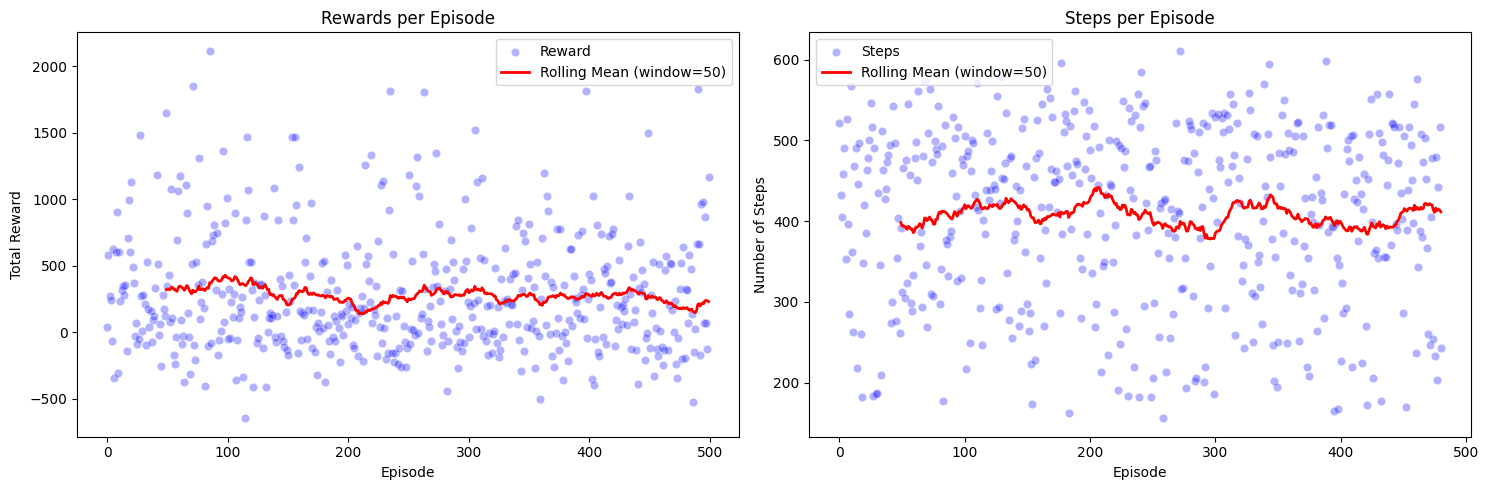

In [2]:
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)

agent = RuleBasedAgent(env=env, strategy='fastest_adjacent')
all_episode_rewards, all_timesteps, all_episode_reward_types, fast_log_file = agent.evaluate_agent(num_episodes=500, output_file=f'./logs/task2/fast_lane/fast_lane_test_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json')

print(f'Average cumulative rewards for Fastest Adjacent Lane strategy: {round(np.mean(all_episode_rewards))}')
print(f'Average timesteps to termination for Fastest Adjacent Lane strategy: {round(np.mean(all_timesteps))}')
print(f'Reward types: {all_episode_reward_types}')
agent.plot_metrics(all_episode_rewards, all_timesteps, window_size=50)
plt.show()

In [ ]:
json_path = fast_log_file

extract_timesteps_from_json(json_path)
gif_filename = os.path.basename(json_path).replace('.json', '.gif')

gif_filepath = f'./gifs/task2/{gif_filename}'

create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

### Same Lane

100%|██████████| 500/500 [00:39<00:00, 12.62it/s]


Truncated episodes: 5
Average cumulative rewards for Same Lane Agent 1: -1027
Average timesteps to termination for Same Lane Agent 1: 504
Reward types: {'time_reward': -999.84, 'lane_change_reward': 0.0, 'clearance_rate_reward': 42.12419999999998, 'risk_accident_reward': -69.614}




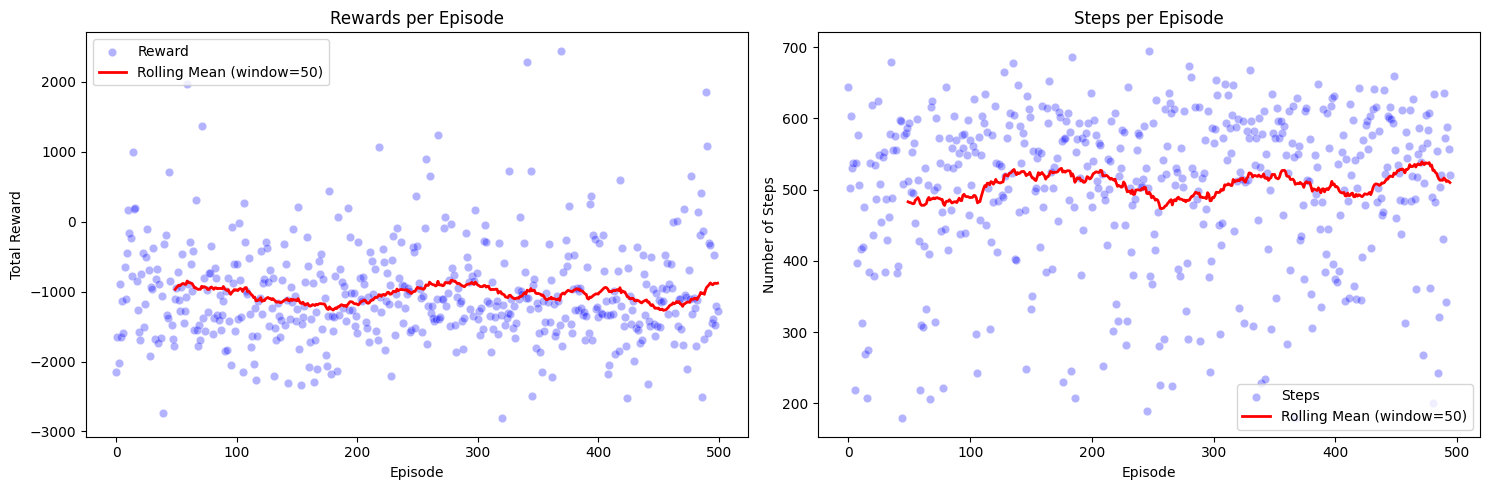

100%|██████████| 500/500 [00:40<00:00, 12.25it/s]


Truncated episodes: 1
Average cumulative rewards for Same Lane Agent 2: -1984
Average timesteps to termination for Same Lane Agent 2: 511
Reward types: {'time_reward': -1020.488, 'lane_change_reward': 0.0, 'clearance_rate_reward': -920.8089999999995, 'risk_accident_reward': -42.546}




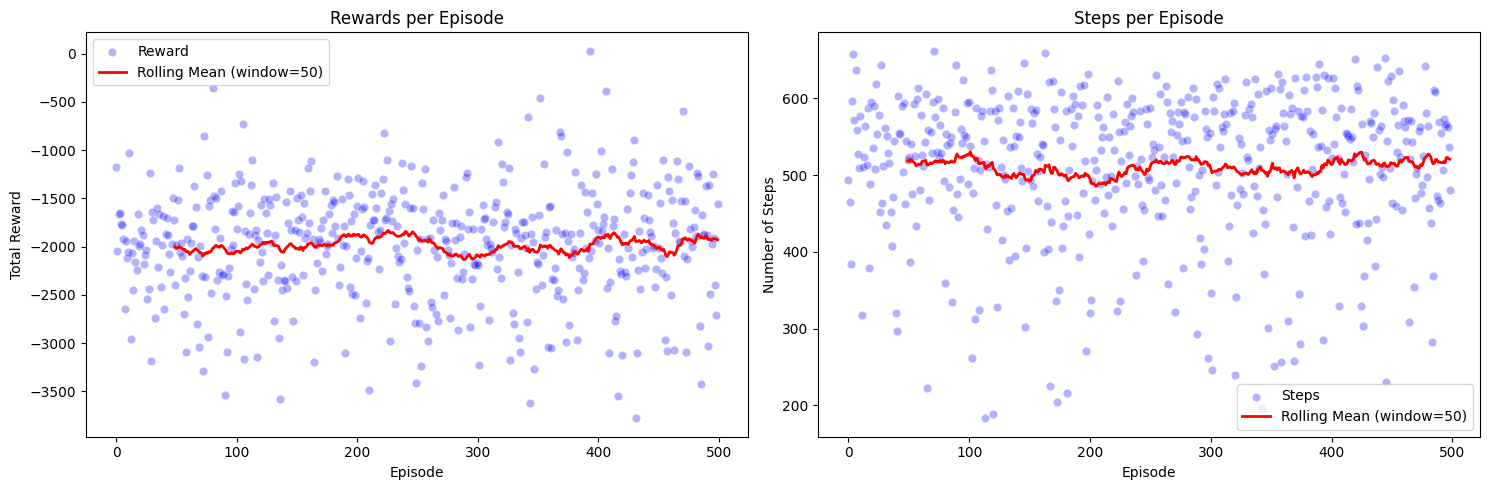

100%|██████████| 500/500 [00:39<00:00, 12.73it/s]


Truncated episodes: 2
Average cumulative rewards for Same Lane Agent 3: -1747
Average timesteps to termination for Same Lane Agent 3: 490
Reward types: {'time_reward': -977.26, 'lane_change_reward': 0.0, 'clearance_rate_reward': -716.7499999999998, 'risk_accident_reward': -52.884}




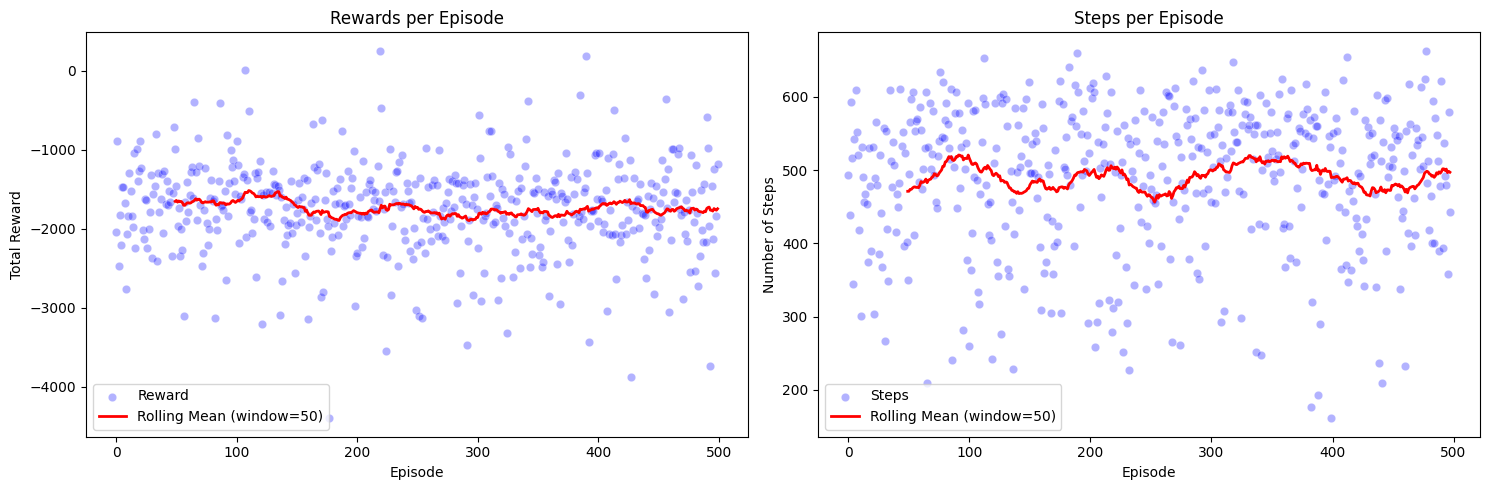

100%|██████████| 500/500 [00:40<00:00, 12.49it/s]


Truncated episodes: 3
Average cumulative rewards for Same Lane Agent 4: -1938
Average timesteps to termination for Same Lane Agent 4: 510
Reward types: {'time_reward': -1013.684, 'lane_change_reward': 0.0, 'clearance_rate_reward': -879.1995999999996, 'risk_accident_reward': -44.702}




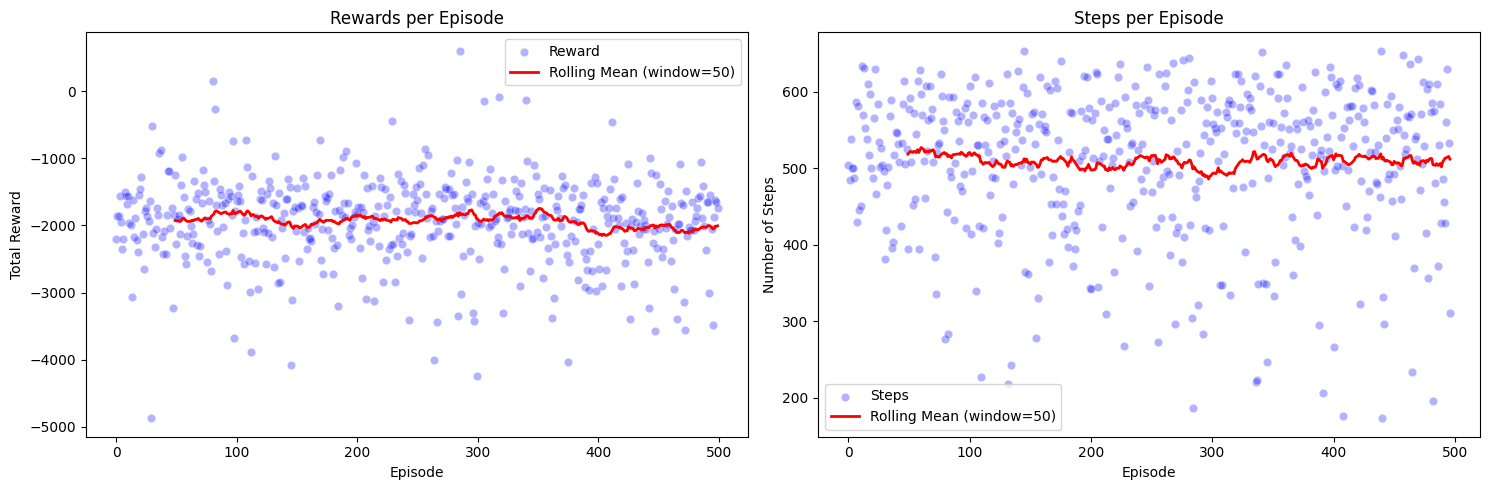

100%|██████████| 500/500 [00:40<00:00, 12.38it/s]


Truncated episodes: 3
Average cumulative rewards for Same Lane Agent 5: -1153
Average timesteps to termination for Same Lane Agent 5: 510
Reward types: {'time_reward': -1013.988, 'lane_change_reward': 0.0, 'clearance_rate_reward': -80.57700000000001, 'risk_accident_reward': -58.51}




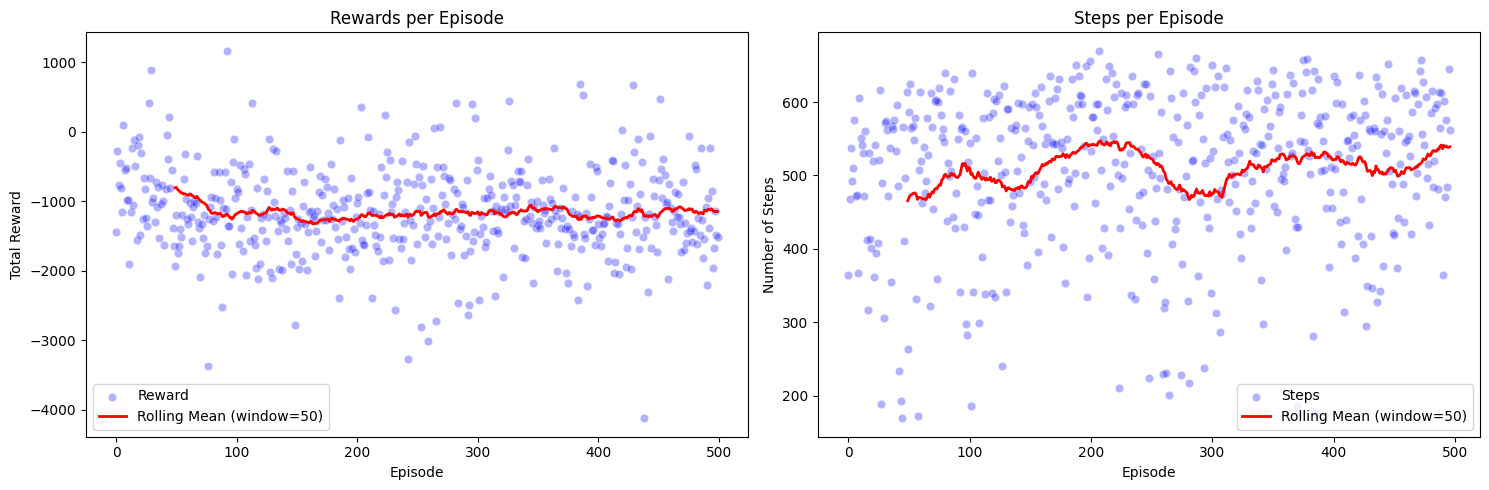

In [5]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
rewards_dict = {}
timesteps_dict = {}
log_files = []
for i in range(5):
    agent = RuleBasedAgent(env=env, strategy='stay')
    all_episode_rewards, all_timesteps, all_episode_reward_types, log_file = agent.evaluate_agent(num_episodes=500, starting_lane=i+1, output_file=f'./logs/task2/same_lane/rule_lane{i+1}_test_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json')
    log_files.append(log_file)
    rewards_dict[f'Same Lane Agent {i+1}'] = all_episode_rewards
    timesteps_dict[f'Same Lane Agent {i+1}'] = all_timesteps
    
    print(f'Average cumulative rewards for Same Lane Agent {i+1}: {round(np.mean(all_episode_rewards))}')
    print(f'Average timesteps to termination for Same Lane Agent {i+1}: {round(np.mean(all_timesteps))}')
    print(f'Reward types: {all_episode_reward_types}')
    print('\n')
    agent.plot_metrics(all_episode_rewards, all_timesteps, window_size=50)
    plt.show()

In [ ]:
for i in range(1):
    json_path = log_files[i]

    extract_timesteps_from_json(json_path)
    gif_filename = os.path.basename(json_path).replace('.json', '.gif')

    gif_filepath = f'./gifs/task2/{gif_filename}'

    create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 288 timesteps
GIF saved at ./gifs/task2/rule_lane1_test_log_20241107_164346.gif


## Value-based Agent

### Q-Learning

#### Training

100%|██████████| 1705/1705 [03:26<00:00,  8.26it/s]


Early Termination Count: 49
Average total reward per episode = -335.20099706744867
Average steps per episode = 420.10084541062804


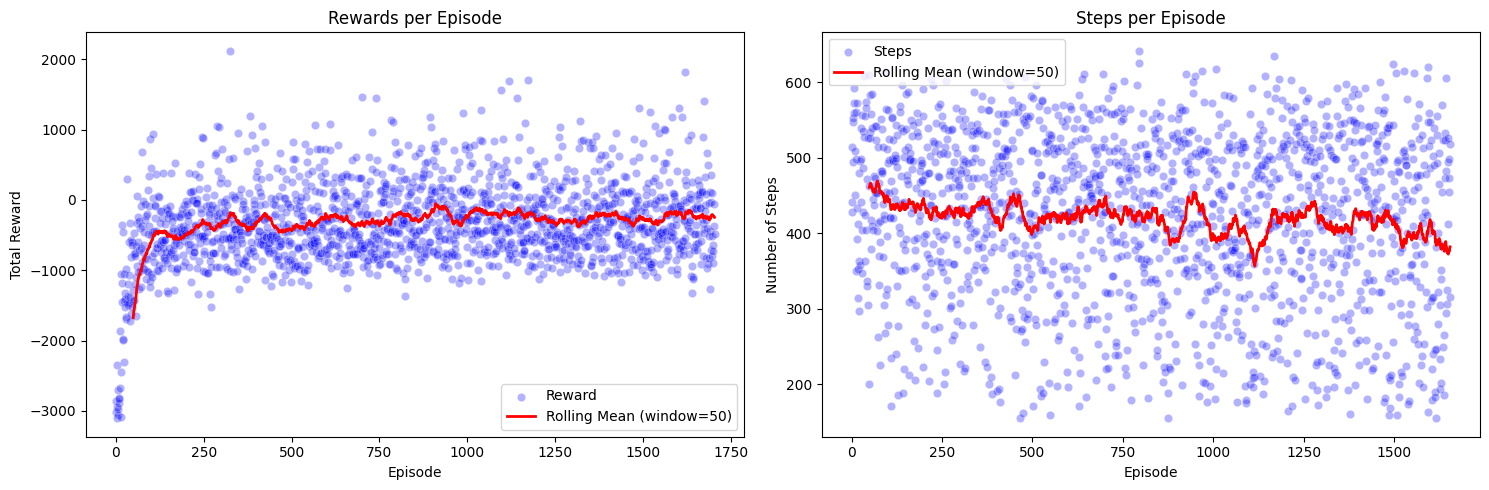

In [20]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

q_learning = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = q_learning.train(num_episodes = 1705, on_policy = False, save_model = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
q_learning.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

Action Distribution:
Left:  1482 (32.7%)
Stay:  1774 (39.2%)
Right: 1273 (28.1%)


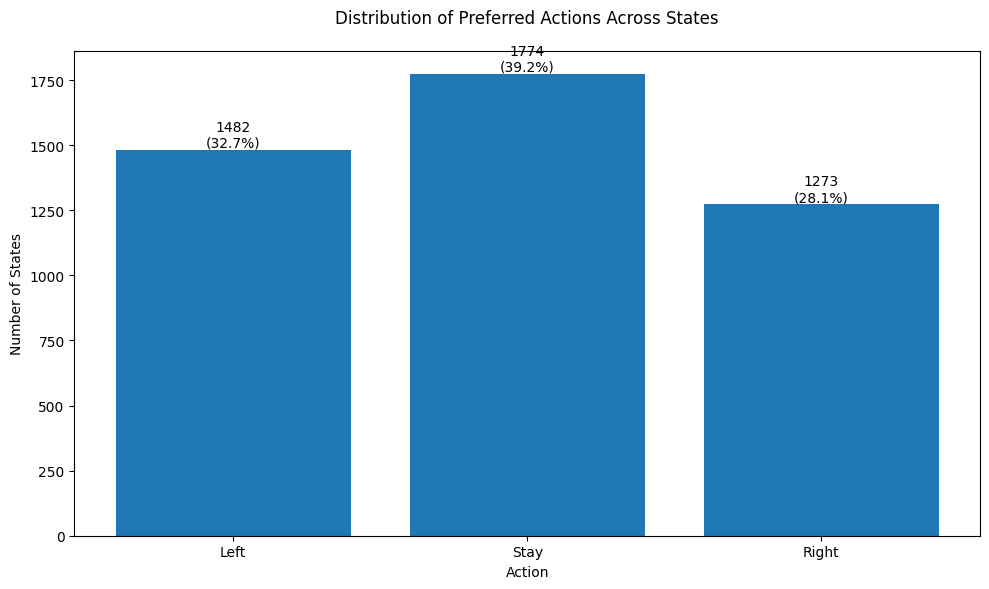

(1482, 1774, 1273, 32.722455288143074, 39.169794656657096, 28.107750055199826)

In [22]:
q_learning.analyze_model_actions()

#### Evaluation

100%|██████████| 500/500 [01:25<00:00,  5.88it/s]


Early terminations: 12
Average cumulative rewards for TD-Lambda Agent: -45
Average timesteps to termination for TD-Lambda Agent: 406
Reward types: {'time_reward': -796.42, 'lane_change_reward': 116.57879999999999, 'clearance_rate_reward': 827.272, 'risk_accident_reward': -191.944}


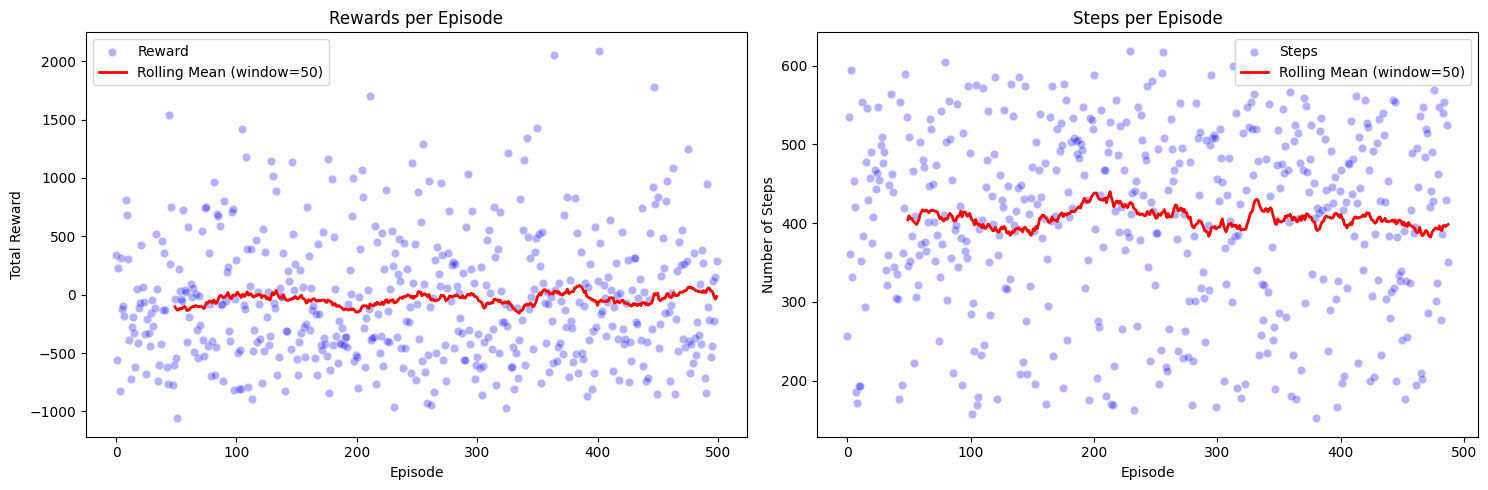

In [21]:
# Training and evaluation using different seeds
q_learning.Env.set_seed(seed)
q_learning.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = q_learning.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

q_learning.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### SARSA

#### Training

100%|██████████| 2000/2000 [02:44<00:00, 12.15it/s]


Early Termination Count: 66
Average total reward per episode = -334.1993
Average steps per episode = 421.70992761116855


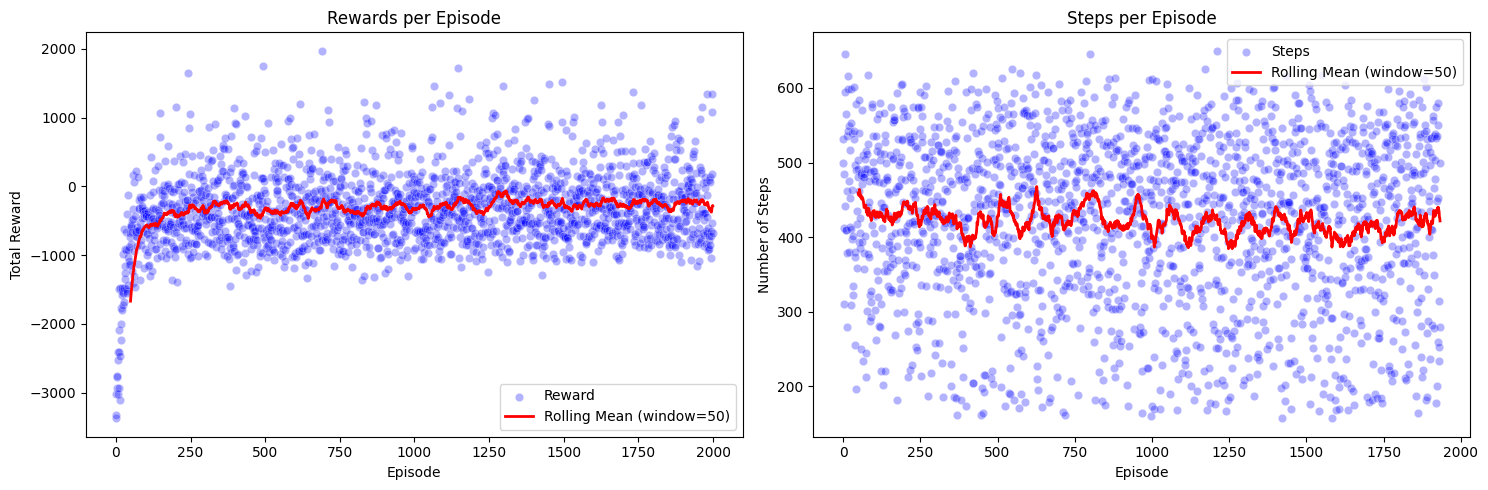

In [28]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

sarsa = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = sarsa.train(num_episodes = 2000, on_policy = True, save_model = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
sarsa.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

Action Distribution:
Left:  1508 (33.1%)
Stay:  1810 (39.8%)
Right: 1233 (27.1%)


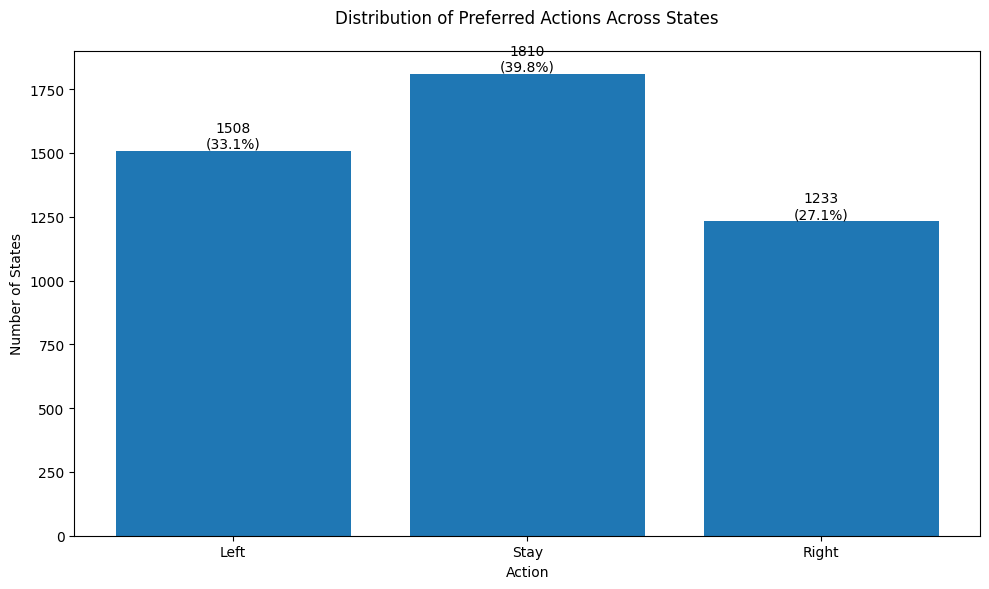

(1508, 1810, 1233, 33.13557459898923, 39.771478795869044, 27.092946605141726)

In [29]:
sarsa.analyze_model_actions()

#### Evaluation

100%|██████████| 500/500 [00:34<00:00, 14.36it/s]


Early terminations: 20
Average cumulative rewards for TD-Lambda Agent: -9
Average timesteps to termination for TD-Lambda Agent: 407
Reward types: {'time_reward': -785.684, 'lane_change_reward': 107.2374, 'clearance_rate_reward': 859.6202000000001, 'risk_accident_reward': -190.168}


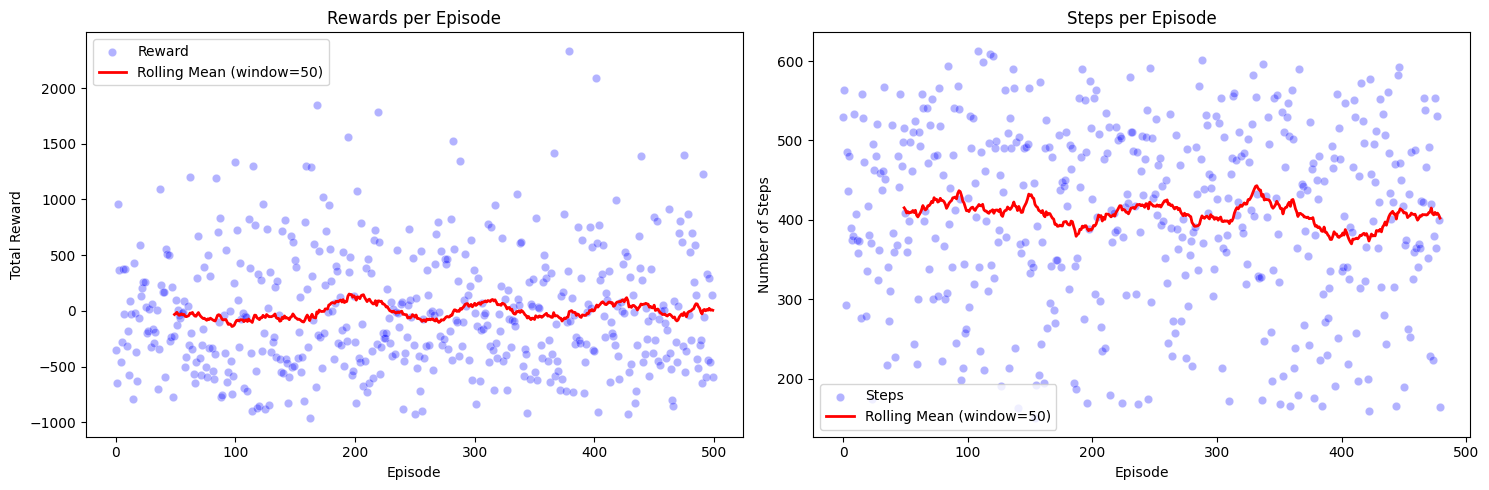

In [30]:
# Training and evaluation using different seeds
sarsa.Env.set_seed(seed)
sarsa.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = sarsa.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

sarsa.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### TD-Lambda

#### Training

In [16]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

td_lambda = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0.9, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = td_lambda.train(num_episodes = 1720, on_policy = True, save_model = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
td_lambda.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

 26%|██▌       | 450/1720 [15:34<43:56,  2.08s/it]  


KeyboardInterrupt: 

In [ ]:
td_lambda.analyze_model_actions()

#### Evaluation

In [ ]:
# Training and evaluation using different seeds
td_lambda.Env.set_seed(seed)
td_lambda.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = td_lambda.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

td_lambda.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### Monte-Carlo

#### Training

In [ ]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

mc = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=1, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = mc.train(num_episodes = 1720, on_policy = True, save_model = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
mc.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

In [ ]:
mc.analyze_model_actions()

#### Evaluation

In [ ]:
# Training and evaluation using different seeds
mc.Env.set_seed(seed)
mc.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = mc.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

mc.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### Visualization

In [42]:
json_path = log_file

extract_timesteps_from_json(json_path)
gif_filename = os.path.basename(json_path).replace('.json', '.gif')

gif_filepath = f'./gifs/task2/{gif_filename}'

create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 293 timesteps
GIF saved at ./gifs/task2/test_log_tdlambda_20241107_164214.gif


### Hyperparameter Tuning

In [ ]:
episodes = 1000
trials = 10
on_policy = False
hyperparameter_space = {
    'alpha': [1e-4, 1e-1],           # Learning rate range (log scale)
    'gamma': [0.1, 0.99],            # Discount factor range
    'epsilon_min': [0.01, 0.1],      # Minimum epsilon range
    # 'lambd': [0, 0.9]             # Lambda range for eligibility traces
}
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)
td_lambda = TemporalDifference(env)
# Run hyperparameter tuning
best_agent, best_params = td_lambda.hyperparameter_tuning(hyperparameter_space=hyperparameter_space, lambd=0, episodes=episodes, n_trials=trials, on_policy=on_policy)

[I 2024-11-12 00:37:44,784] A new study created in memory with name: no-name-47643eab-5ec1-4417-9789-aa4dd93c9e66
100%|██████████| 1000/1000 [37:02<00:00,  2.22s/it]
[I 2024-11-12 01:14:47,688] Trial 0 finished with value: -153.49860000000004 and parameters: {'alpha': 0.00024075717564454792, 'gamma': 0.9221714339896144, 'epsilon_min': 0.08025130357325999}. Best is trial 0 with value: -153.49860000000004.


Early Termination Count: 40
Trial 0: Average Reward = -153.50


100%|██████████| 1000/1000 [47:53<00:00,  2.87s/it]
[I 2024-11-12 02:02:41,440] Trial 1 finished with value: -15.60380000000001 and parameters: {'alpha': 0.0003398740093986593, 'gamma': 0.5355742003960353, 'epsilon_min': 0.0924955523589111}. Best is trial 1 with value: -15.60380000000001.


Early Termination Count: 30
Trial 1: Average Reward = -15.60


100%|██████████| 1000/1000 [49:44<00:00,  2.98s/it]
[I 2024-11-12 02:52:26,007] Trial 2 finished with value: 231.8962 and parameters: {'alpha': 0.0001246474797833307, 'gamma': 0.7066191202017328, 'epsilon_min': 0.026649515586480044}. Best is trial 2 with value: 231.8962.


Early Termination Count: 38
Trial 2: Average Reward = 231.90


100%|██████████| 1000/1000 [50:56<00:00,  3.06s/it]
[I 2024-11-12 03:43:22,125] Trial 3 finished with value: 135.2648 and parameters: {'alpha': 0.00016953301404944732, 'gamma': 0.5297156182818222, 'epsilon_min': 0.055899926999994326}. Best is trial 2 with value: 231.8962.


Early Termination Count: 44
Trial 3: Average Reward = 135.26


100%|██████████| 1000/1000 [51:50<00:00,  3.11s/it]
[I 2024-11-12 04:35:12,261] Trial 4 finished with value: 259.709 and parameters: {'alpha': 0.008752012207793453, 'gamma': 0.5425408458527404, 'epsilon_min': 0.015111784668765893}. Best is trial 4 with value: 259.709.


Early Termination Count: 39
Trial 4: Average Reward = 259.71


100%|██████████| 1000/1000 [53:24<00:00,  3.20s/it]
[I 2024-11-12 05:28:36,937] Trial 5 finished with value: 39.54580000000001 and parameters: {'alpha': 0.02404757548352857, 'gamma': 0.5164119135595031, 'epsilon_min': 0.09372704922578438}. Best is trial 4 with value: 259.709.


Early Termination Count: 28
Trial 5: Average Reward = 39.55


100%|██████████| 1000/1000 [54:39<00:00,  3.28s/it]
[I 2024-11-12 06:23:16,770] Trial 6 finished with value: 22.388599999999983 and parameters: {'alpha': 0.03663381600585518, 'gamma': 0.6372439132289363, 'epsilon_min': 0.08439095865541876}. Best is trial 4 with value: 259.709.


Early Termination Count: 36
Trial 6: Average Reward = 22.39


100%|██████████| 1000/1000 [54:12<00:00,  3.25s/it] 
[I 2024-11-12 07:17:29,027] Trial 7 finished with value: 282.9198 and parameters: {'alpha': 0.00015706152237655554, 'gamma': 0.7883447996044356, 'epsilon_min': 0.01791828850996019}. Best is trial 7 with value: 282.9198.


Early Termination Count: 40
Trial 7: Average Reward = 282.92


100%|██████████| 1000/1000 [55:11<00:00,  3.31s/it]
[I 2024-11-12 08:12:40,837] Trial 8 finished with value: 112.35560000000001 and parameters: {'alpha': 0.0026581172560905535, 'gamma': 0.28703167070444124, 'epsilon_min': 0.07872698572476729}. Best is trial 7 with value: 282.9198.


Early Termination Count: 27
Trial 8: Average Reward = 112.36


 56%|█████▋    | 565/1000 [31:21<24:08,  3.33s/it] 
[W 2024-11-12 08:44:01,889] Trial 9 failed with parameters: {'alpha': 0.007719173761800963, 'gamma': 0.47137674832135956, 'epsilon_min': 0.04490380993965582} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\notebooks\../src\task2_agents.py", line 432, in objective
    rewards, _ = self.train(num_episodes=episodes, on_policy = on_policy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\OneDrive - 

KeyboardInterrupt: 

## Policy-based Agent

### Training

In [17]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor

KeyboardInterrupt: 

In [ ]:
# Initialize and vectorize the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
check_env(env, warn=True)
eval_env = Monitor(env)

# Set up log directory
log_dir = "./logs/task2/ppo_baseline_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

In [ ]:
# Start TensorBoard to monitor logs
%tensorboard --logdir ./logs/task2/ppo_baseline_model/ --port=5002

### Evaluation

# Load the best baseline model
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()
check_env(env_test)

# Test the model
num_episodes = 10000
file_name = 'ppo_baseline_best_model_test_log.json'
rewards, timesteps = test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)
plot_test_results(rewards=rewards, timesteps=timesteps, interval=1000)